In [24]:
import os
import pandas as pd

In [25]:
directory = r'C:\Users\lubna\OneDrive\Documents\OASIS\unemployment'

In [26]:
files_in_unemployment_directory = os.listdir(directory)

In [27]:
print(files_in_unemployment_directory)

['Unemployment.csv']


In [28]:
if 'Unemployment.csv' in files_in_unemployment_directory:
    file_path = os.path.join(directory, 'Unemployment.csv')
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
else:
    print('The file "Unemployment.csv" is not present in the directory. Please check the file name and extension.')

Dataset loaded successfully.


In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [30]:
print(data.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                    

In [31]:
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [32]:
print(data.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [33]:
data = data.dropna()

print(data.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
print(data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


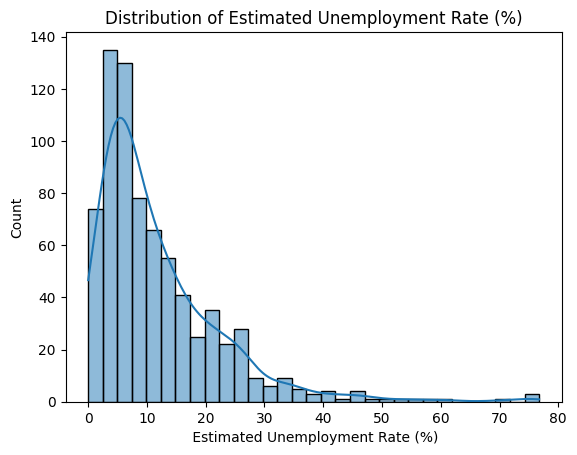

In [39]:
sns.histplot(data[' Estimated Unemployment Rate (%)'], kde=True)
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.show()

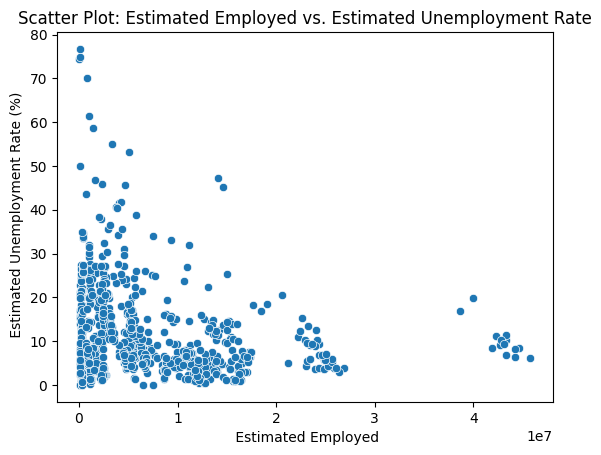

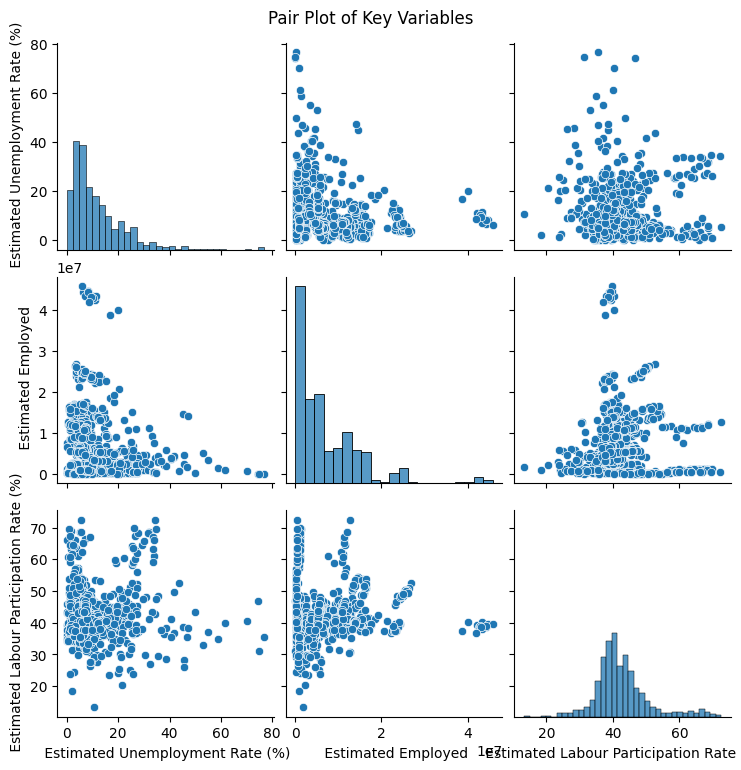

In [44]:
import seaborn as sns

sns.scatterplot(x=' Estimated Employed', y=' Estimated Unemployment Rate (%)', data=data)
plt.title('Scatter Plot: Estimated Employed vs. Estimated Unemployment Rate')
plt.show()

sns.pairplot(data[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

In [45]:
data[' Date'] = pd.to_datetime(data[' Date'], format='%d-%m-%Y')


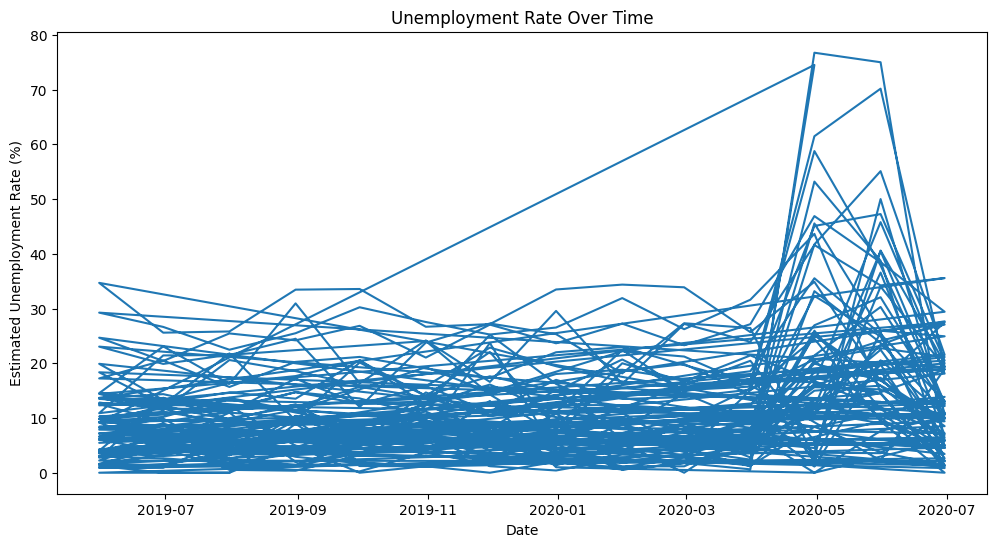

In [46]:
time_series_data = data.set_index(' Date')
plt.figure(figsize=(12, 6))
plt.plot(time_series_data[' Estimated Unemployment Rate (%)'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

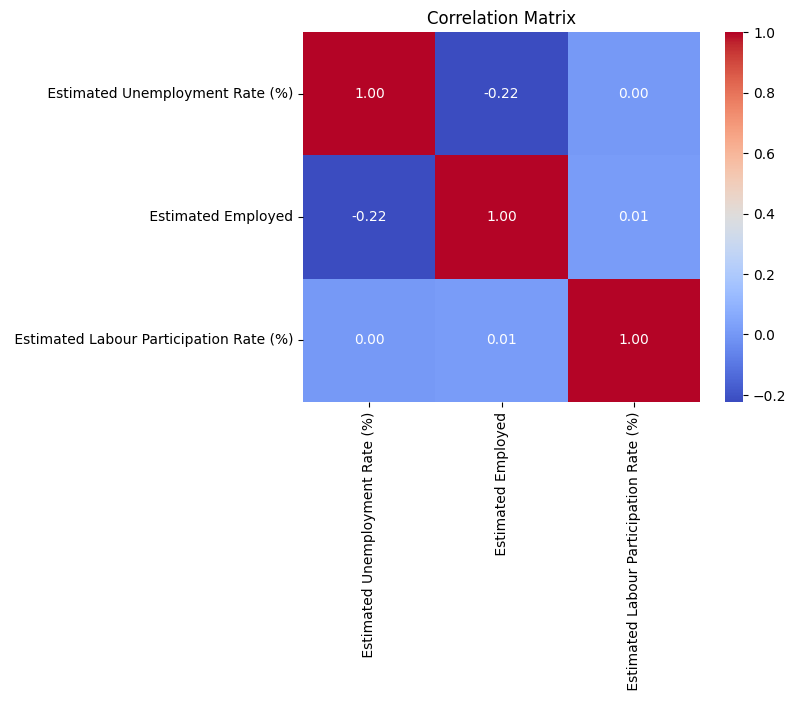

In [50]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

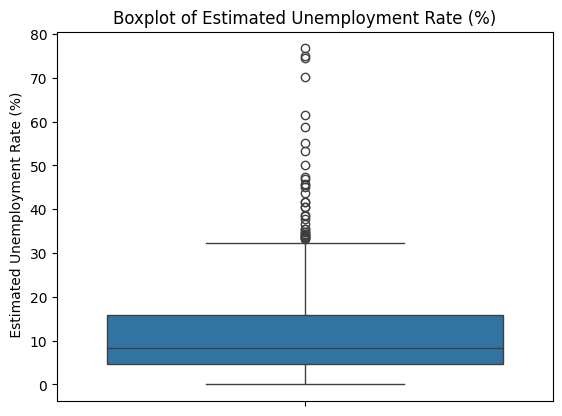

In [52]:
sns.boxplot(data[' Estimated Unemployment Rate (%)'])
plt.title('Boxplot of Estimated Unemployment Rate (%)')
plt.show()